In [146]:
# All Imports
import numpy as np
import matplotlib.pyplot as plt
import math

## Part 1.3

### taylor series for tan(x) around 0

$tan(x)$ can be defined in terms of $sin(x)$ and $cos(x)$ as follows:

$$
tan(x) = \frac{sin(x)}{cos(x)}
$$

Furthermore, sin(x) and cos(x) can be defined as approximations using their respective taylor series:

$$
sin(x) = \sum_{n=0}^{\infty} (-1)^n * \frac{x^{2n+1}}{(2n+1)!} \\

cos(x) = \sum^{\infty}_{n=0} (-1)^n * \frac{x^{2n}}{(2n)!}
$$

Substituting these into the definition of $tan(x)$, we get:
$$
tan(x) = \frac{\text{Taylor series of sin(x)}}{\text{Taylor series of cos(x)}}
$$

In [147]:
def taylor_cos(x: int, n: int) -> np.ndarray:
    """Taylor series expansion of cos(x) at x=0

    Args:
        x (int): single domain value
        n (int): number of terms

    Returns:
        np.ndarray: returns the taylor series expansion of n terms for a particular domain value
    """
    return np.sum([(-1)**i * (x**(2*i) / math.factorial(2*i)) for i in range(n)])

In [148]:
def taylor_sin(x: int, n: int) -> np.ndarray:
    """Taylor series expansion of sin(x) at x=0

    Args:
        x (int): single domain value
        n (int): number of terms

    Returns:
        np.ndarray: returns the taylor series expansion of n terms for a particular domain value
    """
    return np.sum([(-1)**i * (x**(2*i + 1) / math.factorial(2*i + 1)) for i in range(n)])

In [149]:
def taylor_tan(x: int, n: int) -> np.ndarray:
    """Taylor series expansion of tan(x) at x=0

    Args:
        x (int): single domain value
        n (int): number of terms

    Returns:
        np.ndarray: returns the taylor series expansion of n terms for a particular domain value
    """
    return taylor_sin(x, n) / taylor_cos(x, n)

In [150]:
def plot_taylor_tan(domain_start, domain_end, spacing, truncate):
    """Plots the taylor series expansion of tan(x) at x=0

    Args:
        domain_start (int): starting domain value
        domain_end (int): ending domain value
        spacing (int): spacing between domain values
        truncate (int): number of terms to truncate the taylor series expansion
    """
    x = np.linspace(domain_start, domain_end, spacing)
    y = [taylor_tan(i, truncate) for i in x]
    # Labels and making it pretty ========================
    plt.xlabel('x')
    plt.ylabel('tan(x)')
    plt.title('taylor series tan(x) plot truncated at n = ' + str(truncate))
    # remove bottom and top spines
    plt.gca().spines['bottom'].set_position('center')
    plt.gca().spines['top'].set_color('none')
    # ===================================================
    plt.ylim(-10, 10)
    plt.plot(x, y)
    plt.show()

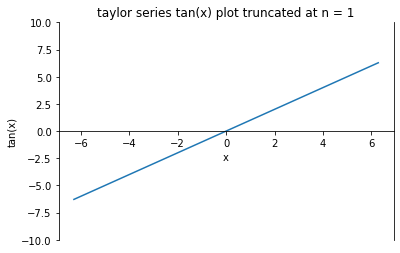

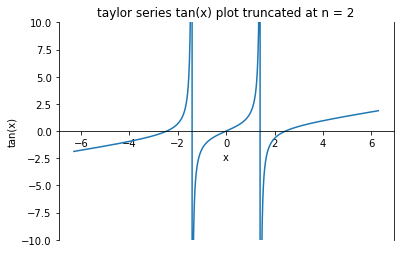

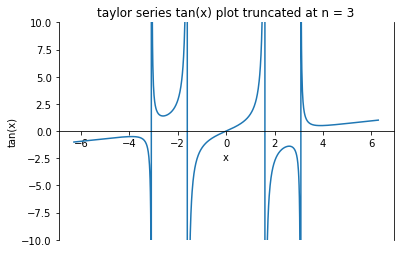

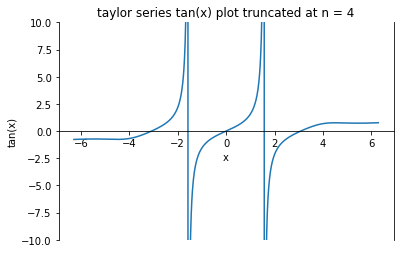

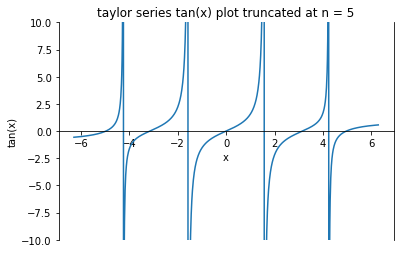

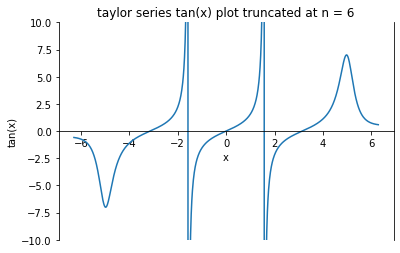

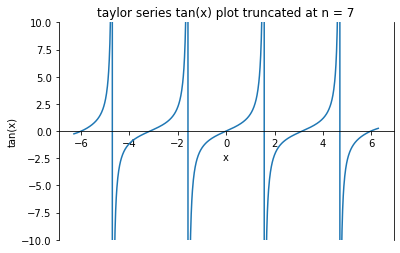

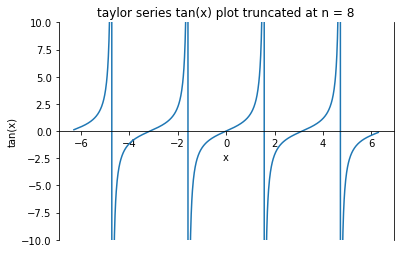

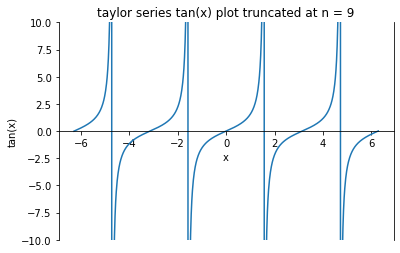

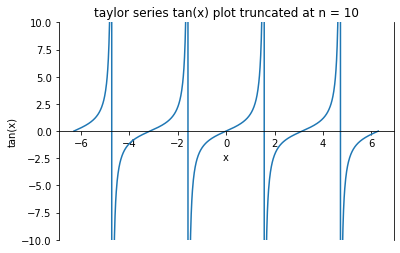

In [151]:
domain_start = -2 * math.pi
domain_end = 2 * math.pi
spacing = 1000

for trunc in range(1, 11):
    plot_taylor_tan(domain_start, domain_end, spacing, trunc)

### plot real vs estimated values

In [152]:
def plot_real_vs_estimate_tan(domain: int, terms: int, str_title) -> None:
    real = np.tan(domain)
    estimates = [taylor_tan(domain, i) for i in range(1, terms+1)]

    # plt.figure(dpi=PLOT_DPI)
    plt.scatter(range(1, terms+1), estimates, label=f"tan({domain}) estimate")
    # add line for real value
    plt.axhline(y=real, color='r', linestyle='-', label=f"tan({domain}) real")
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Number of terms')
    plt.ylabel('Value')
    plt.title(str_title)
    plt.xticks(range(2, terms+1, 2))
    plt.show()

### Examining real vs estimated value for tan(x) for certain points of interest on the domain

Note: I have excluded the values where tan(x) is undefined.

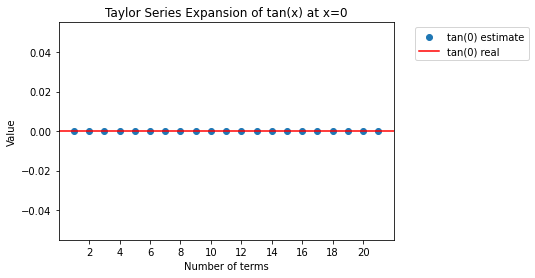

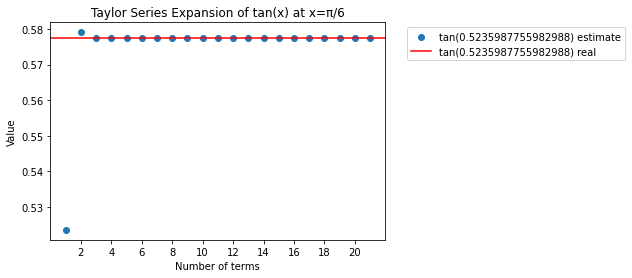

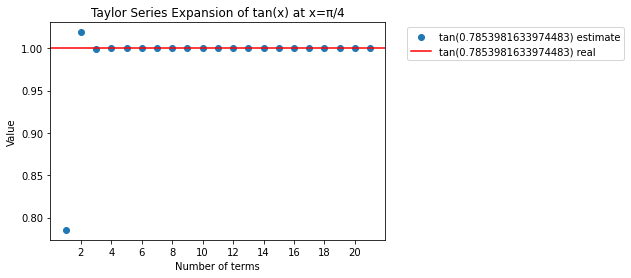

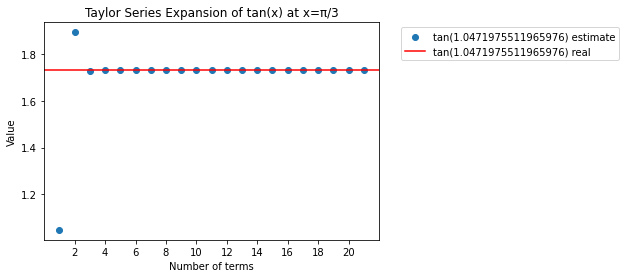

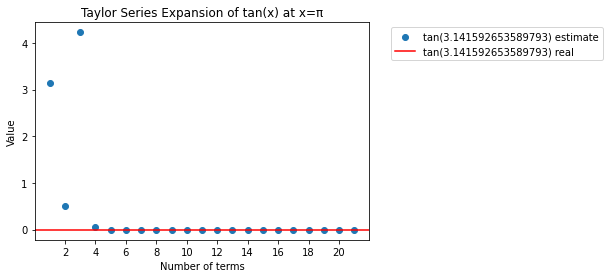

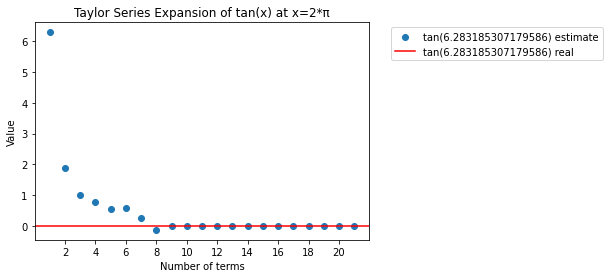

In [153]:
domain = [0, np.pi/6, np.pi/4, np.pi/3, np.pi, 2*np.pi]
domain_str = ['0', 'π/6', 'π/4', 'π/3', 'π', '2*π']
max_terms = 21

for i, d in enumerate(domain):
    plot_real_vs_estimate_tan(d, max_terms, f"Taylor Series Expansion of tan(x) at x={domain_str[i]}")

### Small angle theorem

This states that for sufficiently small values of x, the following holds true

$$
tan(x) \approx x
$$

The task is to find how small the value of $x$ needs to be for it to hold, given an tolerance of 0.01% relative error.

### Relative error

$$
\text{Relative error} = \frac{\text{Absolute error}}{\text{True value}} * 100\%   \\

\text{Absolute error} = |\text{Approximate} - \text{True value} |

$$

### Assumptions
1. I am assuming that the builtin cos function provides the actual value and plot

In [154]:
small_angle_theorem = lambda x: x
tolerance = 0.0001

### Plot actual cosine vs theorem approximation

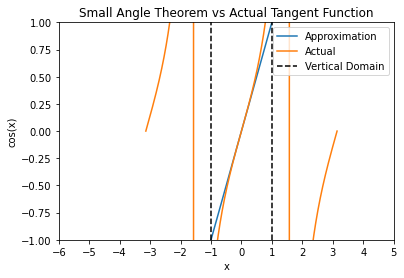

In [155]:
domain = np.linspace(-np.pi, np.pi, 1000)
range_approx = [small_angle_theorem(x) for x in domain]
range_actual = [math.tan(x) for x in domain]

# plot approximation
plt.plot(domain, range_approx, label='Approximation')
# plot actual
plt.plot(domain, range_actual, label='Actual')

# draw vertical dotted lines at 1.5 and -1.5
vertical_domain = 1
plt.axvline(x=vertical_domain, color='black', linestyle='--', label='Vertical Domain')
plt.axvline(x=-vertical_domain, color='black', linestyle='--')

plt.ylim(-1, 1) # limit y axis between 2 and -2
plt.xticks(np.arange(-6, 6, 1)) # label x axis at intervals of 1
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.title('Small Angle Theorem vs Actual Tangent Function')
plt.legend(loc='upper right')

plt.show()

From the above graph we can see that at some domain between -1 and 1, the values of the actual tangent function and the approximation (small angle theorem) intersect presumably with a tolerance less than the required 0.01%

Next, I will just be finding that necessary range where the requirement of the tolerance holds true.

In [156]:
def relative_error(approx, actual):
    return abs((approx - actual) / actual)

Approximation is within tolerance of actual for all values in domain between -0.017300000000218363 and 0.017399999999777815


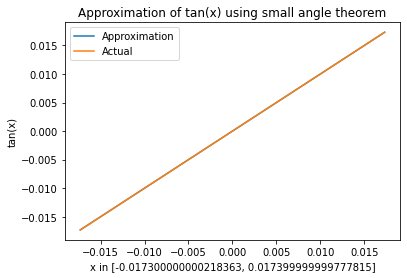

In [157]:
domain = np.arange(-2, 2, tolerance)
range_approx = [small_angle_theorem(x) for x in domain]
range_actual = [math.tan(x) for x in domain]

errors = [relative_error(approx, actual) for approx, actual in zip(range_approx, range_actual)]

# domain where approximation is equal to actual within tolerance
tolerance_domain = [True if error < tolerance else False for error in errors]

# find index of first True and last True in tolerance_domain
first_true = tolerance_domain.index(True)
last_true = len(tolerance_domain) - tolerance_domain[::-1].index(True)

# check if all the values between first_true and last_true are True
all_true = all(tolerance_domain[first_true:last_true])
if all_true:
    print(f'Approximation is within tolerance of actual for all values in domain between {domain[first_true]} and {domain[last_true]}')

plt.plot(domain[first_true:last_true], range_approx[first_true:last_true], label='Approximation')
plt.plot(domain[first_true:last_true], range_actual[first_true:last_true], label='Actual')
plt.title('Approximation of tan(x) using small angle theorem')
plt.xlabel(f'x in [{domain[first_true]}, {domain[last_true]}]')
plt.ylabel('tan(x)')
plt.legend()
plt.show()

